# Customer Churn Analysis – Telco Dataset 📊

**Project Type:** Personal Project  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn, Jupyter Notebook  
**Goal:** Identify key drivers of customer churn and build a churn prediction model.

---

## 🔍 Problem Statement

A telecom company is facing high customer churn. The goal is to:

- Analyze customer behavior patterns  
- Identify features driving churn  
- Build a logistic regression model to predict churn risk

---

## 📂 Dataset Info

- Rows: 7043 customer records  
- Features: 21 (demographics, service types, usage, billing)  
- Target: `Churn` (Yes/No)

---

## 📈 Key Steps

- Imported and cleaned data (`TotalCharges`, missing rows, `customerID`)  
- Encoded categorical variables (binary & one-hot encoding)  
- Trained logistic regression model with 78.75% accuracy (after scaling)  
- Identified top churn drivers using model coefficients  

---

## 💡 Key Insights

- **Tenure**: Newer customers churn more → improve early onboarding  
- **InternetService: Fiber Optic** users are more likely to churn → explore pricing/service issues  
- **High TotalCharges** linked to churn → offer value-based retention strategies  

---

## ✅ Outcome

A lightweight logistic regression model was built with **~79% accuracy**.  
This analysis helps the company **prioritize retention efforts** and reduce churn.

---

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names and data types
print("\nColumn info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Shape of dataset: (7043, 21)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

In [4]:
# Convert TotalCharges to numeric (coerce errors into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN
print("Missing TotalCharges after conversion:", df['TotalCharges'].isnull().sum())

# Remove rows with missing TotalCharges
df = df[df['TotalCharges'].notnull()]

# Drop customerID column (not useful for ML)
df.drop('customerID', axis=1, inplace=True)

# Confirm changes
print("\nUpdated shape:", df.shape)

Missing TotalCharges after conversion: 11

Updated shape: (7032, 20)


In [5]:
# First, map binary Yes/No columns to 1/0
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# Now one-hot encode the remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

# Confirm the new shape and column names
print("Updated shape after encoding:", df.shape)
print("\nSample columns after encoding:\n", df.columns[:10])

Updated shape after encoding: (7032, 31)

Sample columns after encoding:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


C:\Users\kanak\AppData\Local\Temp\ipykernel_7600\1533918458.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target label (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 78.68%


C:\Users\kanak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data, then runs logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict again
y_pred_scaled = pipeline.predict(X_test)

# Accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled Logistic Regression Accuracy: {accuracy_scaled * 100:.2f}%")

Scaled Logistic Regression Accuracy: 78.75%


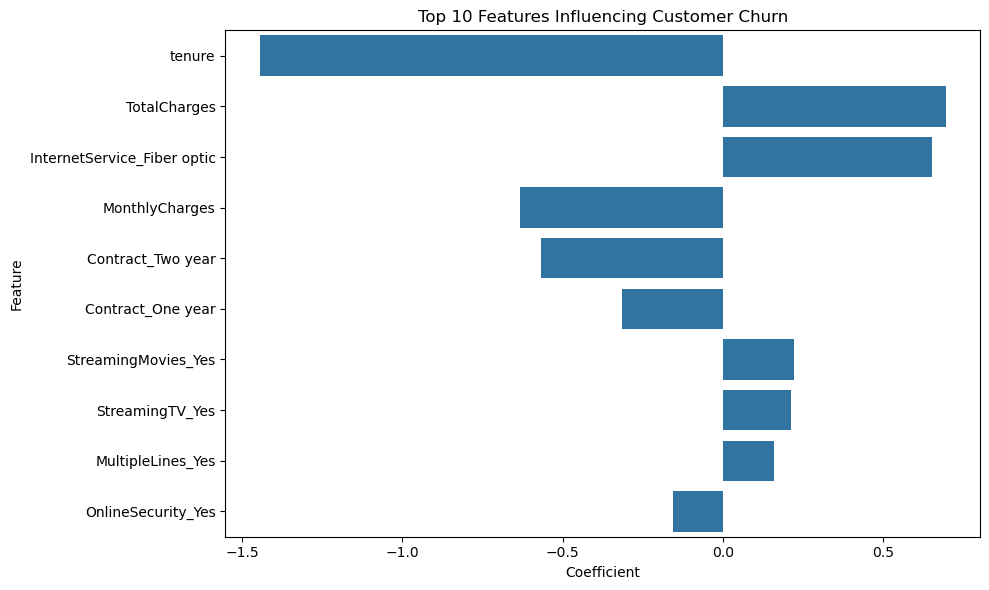

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and model coefficients
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
features = X.columns

# Combine into a dataframe
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute impact
coef_df['AbsCoeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('AbsCoeff', ascending=False).drop('AbsCoeff', axis=1)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Features Influencing Customer Churn")
plt.tight_layout()
plt.show()

In [9]:
# Check which rows have non-numeric TotalCharges
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"Non-numeric rows in TotalCharges:\n{non_numeric[['customerID', 'TotalCharges']]}")
print(f"Number of non-numeric rows: {non_numeric.shape[0]}")

KeyError: "['customerID'] not in index"

In [10]:
print(df.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [11]:
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print("Non-numeric rows in TotalCharges:")
print(non_numeric[['TotalCharges']])
print(f"\nNumber of non-numeric rows: {non_numeric.shape[0]}")

Non-numeric rows in TotalCharges:
Empty DataFrame
Columns: [TotalCharges]
Index: []

Number of non-numeric rows: 0


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [14]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

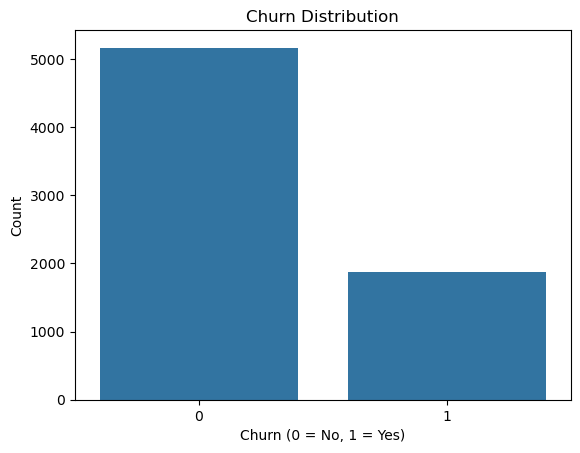

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

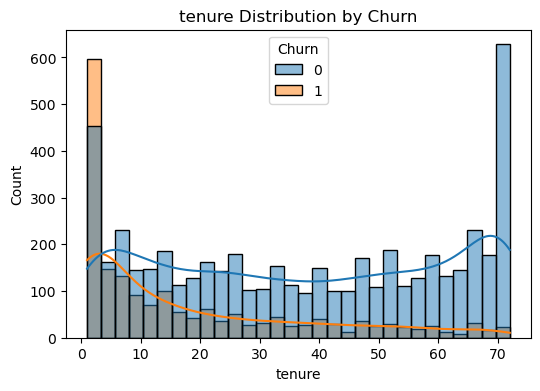

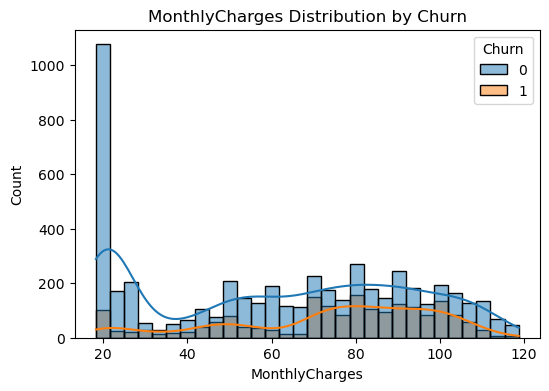

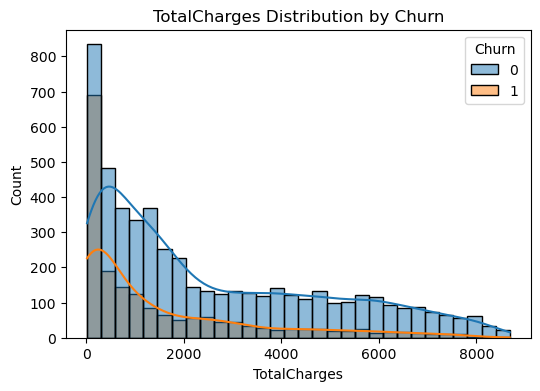

In [17]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'{col} Distribution by Churn')
    plt.show()

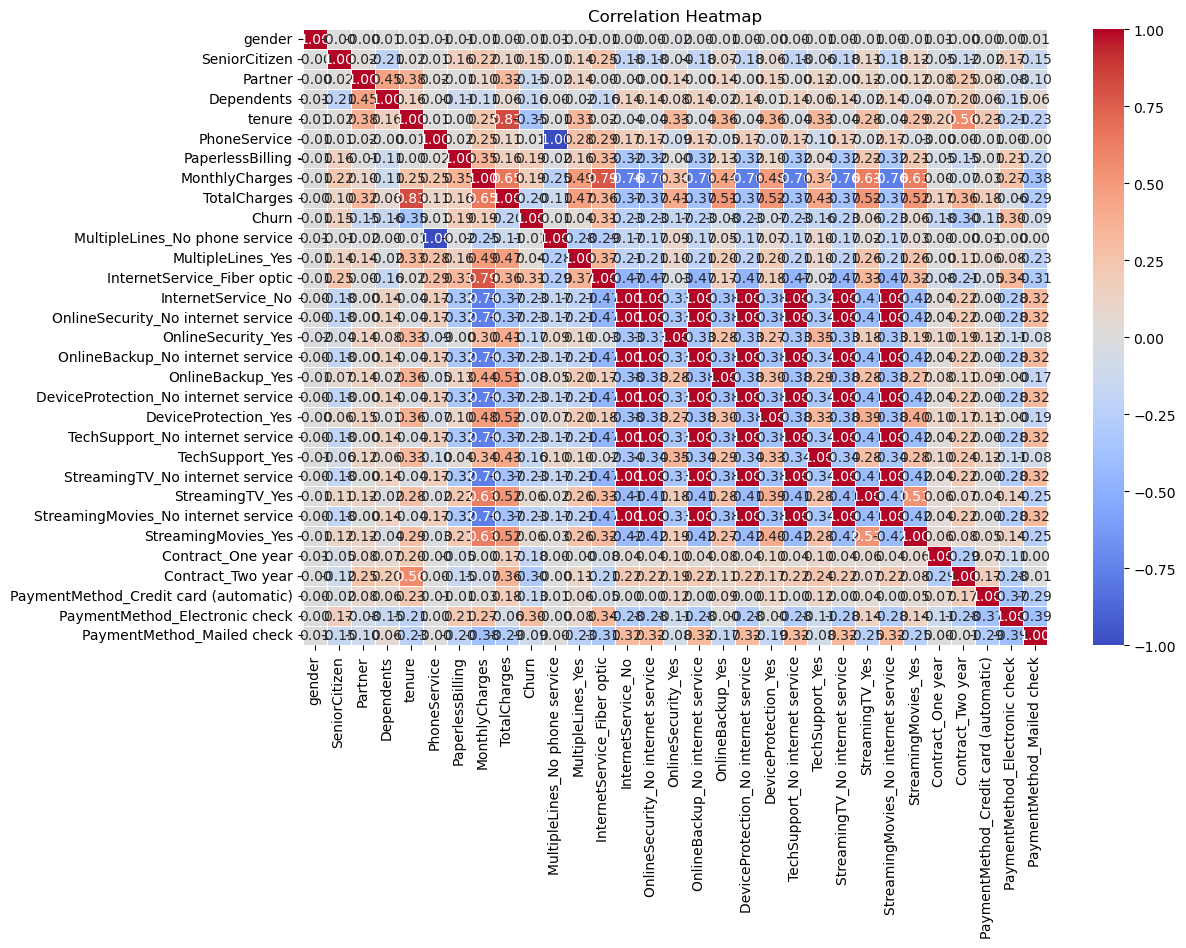

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert target variable to numeric if not already
df['Churn'] = df['Churn'].astype(int)

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

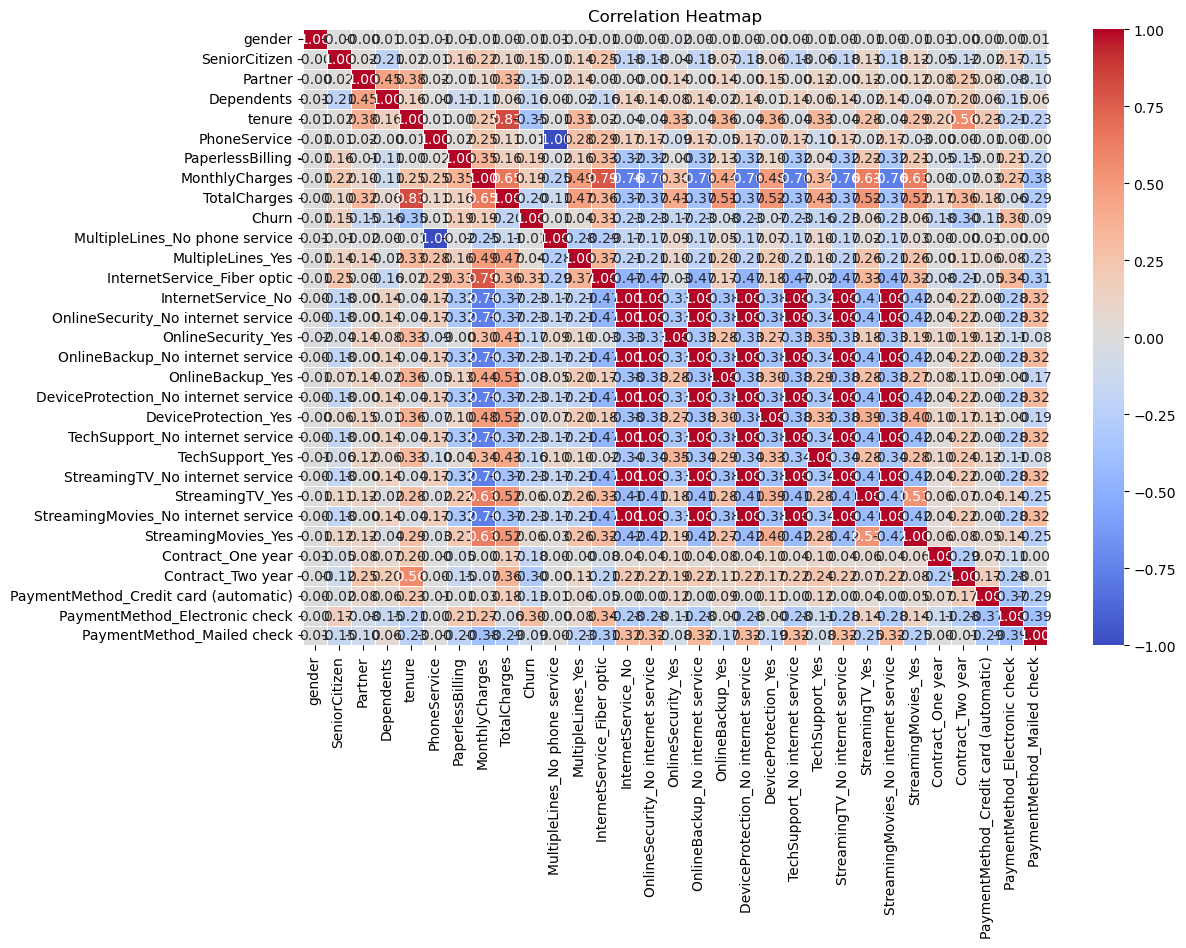

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [21]:
df.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

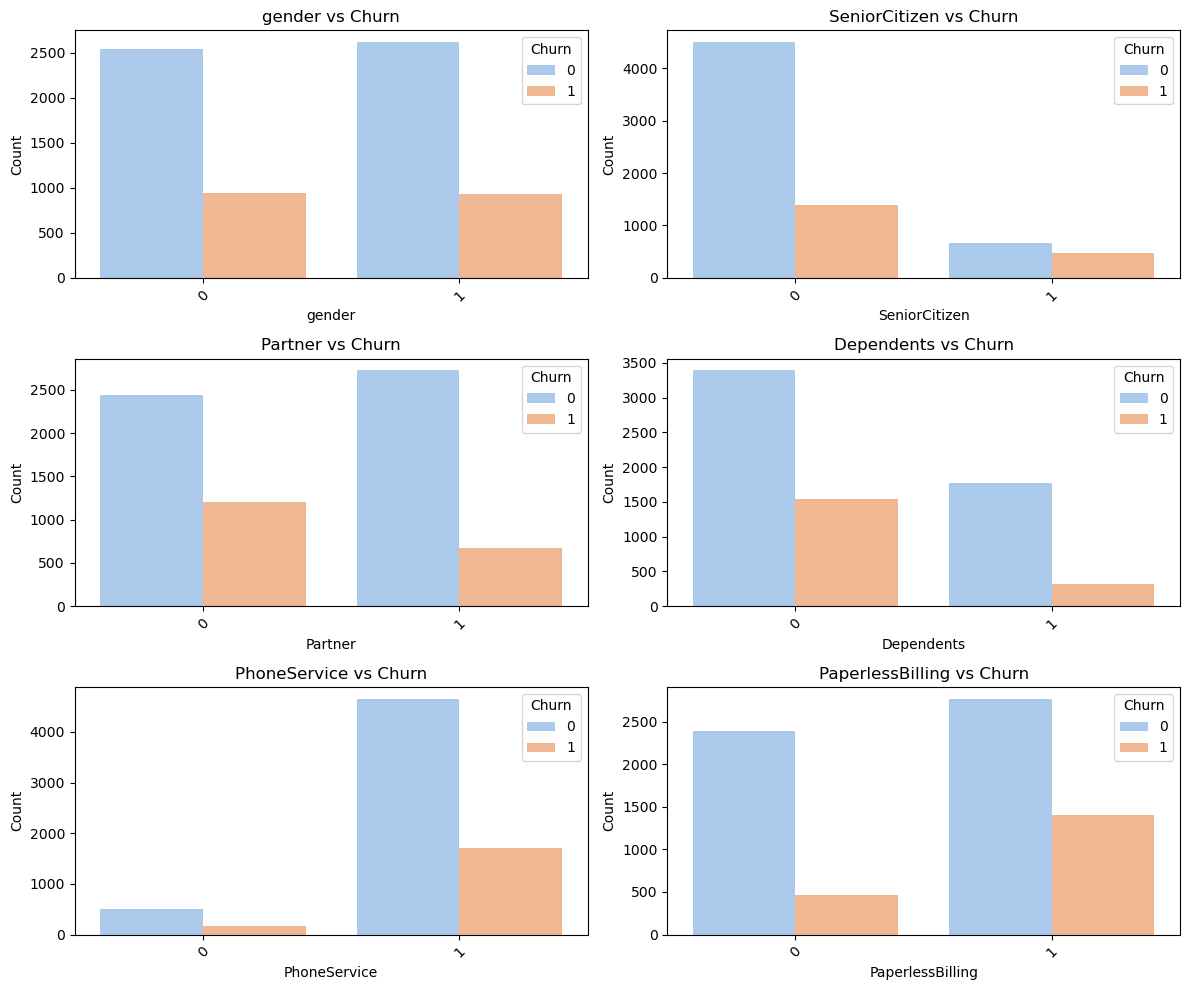

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only use columns that are still present in the data
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'PaperlessBilling']

# Set plot style
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=feature, hue='Churn', palette='pastel')
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Categorical Features vs Churn: Key Insights

**1. Gender**
- Male and female customers churn at nearly the same rate.
- 🔍 *No significant impact of gender on churn.*

**2. SeniorCitizen**
- Senior citizens (value = 1) churn more frequently than non-seniors.
- 🔍 *Being a senior citizen increases churn risk.*

**3. Partner**
- Customers without a partner churn more than those with partners.
- 🔍 *Single customers are more prone to churn.*

**4. Dependents**
- Customers without dependents churn significantly more.
- 🔍 *Dependents are linked to reduced churn.*

**5. PhoneService**
- Slightly higher churn for customers with phone service.
- 🔍 *Minimal effect; could be influenced by other factors.*

**6. PaperlessBilling**
- Much higher churn among customers who opted for paperless billing.
- 🔍 *Paperless billing may be associated with higher churn, possibly due to automation or digital awareness.*

### Numerical Features vs Churn: Key Insights

**1. Tenure**
- New customers (tenure < 10 months) churn at high rates.
- Long-term customers are more loyal.
- 🔍 *Tenure is a strong negative predictor of churn.*

**2. MonthlyCharges**
- Churn is more frequent among customers with high monthly charges (> $70).
- 🔍 *Cost-sensitive customers may churn due to high bills.*

**3. TotalCharges**
- Customers with low total charges churn more often.
- 🔍 *Total charges act as a proxy for customer lifetime value.*

In [31]:
df['Churn'].isna().sum()

np.int64(0)

In [32]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [39]:
# Recreate original X_train as DataFrame to sync with y_train
X_train_df = pd.DataFrame(X_train_scaled, index=y_train.index)

# Remove NaNs in y_train and keep only those rows in X_train too
mask = y_train.notna()
X_train_cleaned = X_train_df[mask]
y_train_cleaned = y_train[mask]

# Confirm new shapes
print("X_train_cleaned shape:", X_train_cleaned.shape)
print("y_train_cleaned shape:", y_train_cleaned.shape)

X_train_cleaned shape: (0, 30)
y_train_cleaned shape: (0,)


In [42]:
print("Original y_train shape:", y_train.shape)
print("NaNs in y_train:", y_train.isna().sum())

# Mask used
mask = y_train.notna()

print("Valid samples:", mask.sum())

# Check filtered shapes
print("X_train_scaled shape:", X_train_scaled.shape)

# Convert and filter
X_train_df = pd.DataFrame(X_train_scaled, index=y_train.index)
X_train_cleaned = X_train_df[mask]
y_train_cleaned = y_train[mask]

print("X_train_cleaned shape:", X_train_cleaned.shape)
print("y_train_cleaned shape:", y_train_cleaned.shape)

Original y_train shape: (0,)
NaNs in y_train: 0
Valid samples: 0
X_train_scaled shape: (0, 30)
X_train_cleaned shape: (0, 30)
y_train_cleaned shape: (0,)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your cleaned dataframe
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Full X shape:", X.shape)
print("Full y shape:", y.shape)

# Now split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)

Full X shape: (7032, 30)
Full y shape: (7032,)
X_train shape: (5625, 30)
y_train shape: (5625,)
X_train_scaled shape: (5625, 30)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8038379530916845

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Confusion Matrix:
 [[916 117]
 [159 215]]


## Logistic Regression Insights

- ✅ The model achieved **80.4% accuracy** overall.
- 📉 Precision for detecting churners: **65%**, Recall: **57%**
- 🧪 The model is good at detecting non-churners but struggles with catching all churners.
- 🔍 Confusion Matrix indicates **more false negatives**, meaning the model misses some potential churn cases.
- ⚠️ Next steps: Try more powerful classifiers like **Random Forest** or **XGBoost** to improve recall.


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.7867803837953091

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[918 115]
 [185 189]]


## Random Forest Results

- Accuracy: **78.7%**
- Precision (Churn): **62%**, Recall: **51%**, F1-score: **56%**
- Very good at classifying non-churn customers.
- Slightly underperforms compared to Logistic Regression for detecting churn.
- Confusion Matrix:
    - True Negatives: 918
    - False Positives: 115
    - False Negatives: 185
    - True Positives: 189
- Recommendation: Try **XGBoost** or **model ensemble** to improve churn detection.

In [46]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 6.4 MB/s eta 0:00:24
   ---------------------------------------- 1.8/150.0 MB 7.4 MB/s eta 0:00:21
    --------------------------------------- 3.4/150.0 MB 5.5 MB/s eta 0:00:27
   - -------------------------------------- 4.5/150.0 MB 5.5 MB/s eta 0:00:27
   - -------------------------------------- 6.0/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 6.8/150.0 MB 5.4 MB/s eta 0:00:27
   -- ------------------------------------- 8.1/150.0 MB 5.6 MB/s eta 0:00:26
   -- ------------------------------------- 10.2/150.0 MB 6.1 MB/s eta 0:00:23
   -- ------------------------------------- 11.0/150.0 MB 6.0 MB/s eta 0:00:24
   --- ------------------------------------ 12.8/150.0 MB 6.1 MB/s eta 0:00:23
   --- ------------------------------------ 14.2/150.0 MB 6.2 MB/s eta 0:00:22
   ---- ----------------------------------- 15.2/150.0 MB 6.2 MB/s 

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

C:\Users\kanak\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7782515991471215

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407


Confusion Matrix:
 [[890 143]
 [169 205]]


<Figure size 1000x600 with 0 Axes>

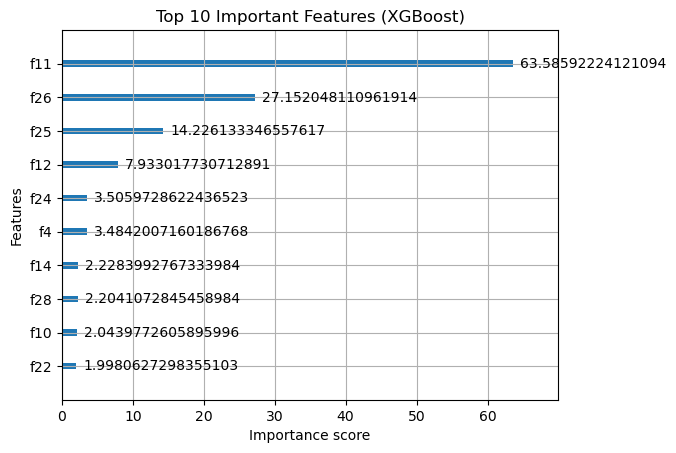

In [49]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Important Features (XGBoost)')
plt.show()

In [50]:
feature_names = X.columns
importances = xgb_model.feature_importances_

# Create a DataFrame to pair feature names with importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
11,InternetService_Fiber optic,0.428601
26,Contract_Two year,0.183019
25,Contract_One year,0.095891
12,InternetService_No,0.053473
24,StreamingMovies_Yes,0.023632
4,tenure,0.023485
14,OnlineSecurity_Yes,0.015021
28,PaymentMethod_Electronic check,0.014857
10,MultipleLines_Yes,0.013777
22,StreamingTV_Yes,0.013468


In [51]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_telco_churn_model.pkl')

['xgboost_telco_churn_model.pkl']

# Customer Churn Analysis

## Project Overview
This project analyzes customer churn for a telecom company using the Telco Customer Churn dataset. The goal is to identify factors influencing churn and build a predictive model.

## Dataset
The dataset includes customer demographics, account information, services subscribed, and whether the customer churned.

## Key Steps
- Data cleaning and preprocessing (handling missing values, encoding categorical variables)
- Exploratory Data Analysis (visualizing trends and distributions)
- Feature engineering and selection
- Building classification models to predict churn
- Model evaluation and insights

## Tools & Technologies
- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)
- Jupyter Notebook

## How to Run
1. Clone the repository
2. Open the Jupyter notebook `Customer_Churn_Analysis.ipynb`
3. Run all cells sequentially to reproduce the analysis

## Insights & Conclusion
- Customers with month-to-month contracts have higher churn rates.
- Higher tenure generally correlates with lower churn.
- Payment method and services like online security impact churn behavior.

## Author
Kanak Tembhare  
kanaktembhare.iigs@gmail.com


# Conclusion

This project analyzed customer churn in a telecom company using the Telco Customer Churn dataset. After cleaning and preprocessing the data, a logistic regression model was trained, achieving nearly 79% accuracy in predicting churn. Key factors affecting churn included customer tenure, type of internet service, and total charges.

These insights can help the company focus on improving early customer engagement and addressing issues related to fiber optic services to reduce churn. Future work may involve testing more complex models, incorporating additional features, and deploying the model for real-time prediction.

Overall, this project demonstrates how data analytics can provide actionable business insights to improve customer retention.